In [1]:
#Sebastian Russo 79117092
#Artificial Intelligence

#Import necessary libraries
import numpy as nmp                         #Library to create multidimensional vectors and matrixes 
import pandas                               #Library to manipulate and analyze datasets 
import matplotlib.pyplot as matplt          #Library to make python matplotlib work like MATLAB

#%matplotlib inline enables the inline display of matplotlib plots directly

import seaborn as seab                       #Library for data visualization and correlation matrix

#----------------------------------------------------------------------------------------------------
#Library to import only to split datasets into random train and test subsets
from sklearn.model_selection import train_test_split

#Implement ordinary least squares linear regression
from sklearn.linear_model import LinearRegression 

#From the metrics module, import function to calculate the mean squared error (MSE)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#From the metrics module, import function to encode categorical data in case is numpy array
from sklearn.preprocessing import LabelEncoder

c:\Users\Acer\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Read the .csv file and assign to a variable, use delimiter='\t' because the file uses tab delimiters
dfcompanies = pandas.read_csv('1000_Companies.csv', delimiter='\t')

#Check the name of each columns
print(dfcompanies.columns)

#Ensure .read_csv has the correct shape
print("Shape: ",end="")
print(dfcompanies.shape)

#Check number of values in dataset
print("Size:",dfcompanies.size)
print()

#Check Quantitative and Qualitative calculations
dfcompanies.describe()

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')
Shape: (1000, 5)
Size: 5000



,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [3]:
#Separate dependent from independent variables by specifying the columns (small dataframes)
#Independent variables
Xvariable= dfcompanies[["R&D Spend","Administration","Marketing Spend","State"]]

#Dependent variable
Yvariable= dfcompanies["Profit"]

#Check size for both 
print("Idependent variables:",Xvariable.shape)

print("Dependent variables:",Yvariable.shape)


Idependent variables: (1000, 4)
Dependent variables: (1000,)


In [4]:
#Separate dependent from independent variables with .iloc (pandas DataFrame)
#Independent variables
Xvariable= dfcompanies.iloc[:, 0:4] #Starts form 'R&D spend' until state
#First is rows and second is columns, in a syntax startingpoint : endingpointexclusive
#if empty in the left then starts by the first row/column and if empty on the rigth 
#the ending at the last row/column

#Dependent variable
Yvariable= dfcompanies.iloc[:,-1:]  #last column which is 'Profit' and therefore starts from the end

#Check size for both 
print("Idependent variables:",Xvariable.shape)

print("Dependent variables:",Yvariable.shape)

#Perform one-hot encoding on 'State' column it contains categorical data and we work with pandas DataFrame
Xvariable = pandas.get_dummies(Xvariable, columns=['State'], drop_first=True)

Idependent variables: (1000, 4)
Dependent variables: (1000, 1)


In [5]:
#Another way to extract data with .iloc[].values to return as numpy array instead of pandas DataFrame
#Independent variables
Xvariable=dfcompanies.iloc[:,:-1].values
#Same as Xvariable= dfcompanies[["R&D Spend","Administration","Marketing Spend","State"]]

#Dependent variable
Yvariable=dfcompanies.iloc[:,4].values 
#Same as Yvariable= dfcompanies["Profit"]

#Fit and transform the label encoder on the 'State' column
statecolumnencoded = LabelEncoder().fit_transform(Xvariable[:, 3])

#Replace the original 'State' column in Xvariable with the encoded values
Xvariable[:, 3] = statecolumnencoded

#Check size for both 
print("Idependent variables:",Xvariable.shape)

print("Dependent variables:",Yvariable.shape)

Idependent variables: (1000, 4)
Dependent variables: (1000,)


In [6]:
#Split the Independent and Dependent variables into training and testing sets (75%, 25%)
Xtrain,Xtest,Ytrain,Ytest= train_test_split(Xvariable,Yvariable, random_state=1) #Split X and Y

#Verify the shape for each split
print("Xtrain set:",Xtrain.shape)
print("Xtest set:",Xtest.shape)
print("Ytrain set:",Ytrain.shape)
print("Ytest set:",Ytest.shape)

Xtrain set: (750, 4)
Xtest set: (250, 4)
Ytrain set: (750,)
Ytest set: (250,)


In [7]:
#Create a model to predict profits outcome and train it
linreg= LinearRegression()
linreg.fit(Xtrain,Ytrain)


LinearRegression()

In [8]:
#Predict the outcome
predictY= linreg.predict(Xtest)

predictY

array([ 84752.85248553,  76249.45220449, 158185.67433654, 154391.52374109,
        51270.92897353,  52230.3974529 ,  92942.55341484, 153528.31371031,
        96810.0793137 ,  53563.9399882 ,  90529.21728101, 141114.73706879,
       174480.15169387, 100473.91554794, 110767.22845568, 137240.17453723,
        98663.75239151, 171468.55769602,  51688.62177554,  66105.36150732,
       104235.40695988, 167699.25066967,  65613.43385151, 126588.30984725,
        85855.366006  , 173650.62123399, 152404.15284692, 138119.39209143,
        65571.32082702, 171838.20180075,  84456.18113215, 160098.81046369,
       157195.58771532,  57675.0145032 , 125963.32851175,  55909.70377304,
        73590.15219898,  88720.61195295, 117986.07281085, 101669.08864698,
        97739.68232311, 114632.33706256,  63478.88169664, 177972.258911  ,
       156327.86512707, 128817.40151924, 108854.25334371,  48338.27489936,
        85478.22848459,  95287.13358597,  85792.46510606, 126038.72710456,
       160008.89028728,  

In [9]:
#Determine the mean squared error (Acurracy of this model)
Mse= mean_squared_error(Ytest,predictY)
Rs= r2_score(Ytest,predictY)
Mae= mean_absolute_error(Ytest,predictY)

print("Mean Squared error:",Mse) 
print("Mean Absolute error:",Mae)
print("R-squared error:",Rs) #Oscilates between 0 and 1, the closer to 1 the better (interpret as %)

Mean Squared error: 160773965.73097894
Mean Absolute error: 2205.1393554305714
R-squared error: 0.9196583638185823


In [10]:
#Use this when using pandas DataFrame
#print("Actual value",Ytest.values[0:10])
#print()
#print("Predict",predictY[0:10])

In [11]:
#Compare actual with predicted values
print("Actual value", Ytest[0:10])
print()
print("Predict", predictY[0:10])

Actual value [ 84808.91317  76356.55435 157529.6118  154029.5801   51256.61958
  52481.67341  92949.45565 152900.2069   96793.76682  14681.4    ]

Predict [ 84752.85248553  76249.45220449 158185.67433654 154391.52374109
  51270.92897353  52230.3974529   92942.55341484 153528.31371031
  96810.0793137   53563.9399882 ]


<AxesSubplot:>

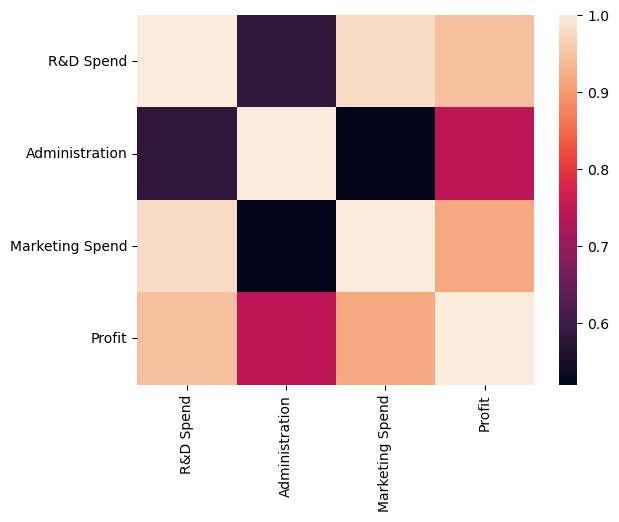

In [12]:
#Other analysis graphics
seab.heatmap(dfcompanies.corr())